# Supplementary figure 3: Cell abundances by spatial slide (cytoSPACE)

In [1]:
global_path = './cell-cell-communication/' ## Path to the github downloaded repository

In [2]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
from collections import Counter
import sys
sys.path.insert(1, global_path + 'Functions/')
from downstream_analysis import obtain_cell_counts 
plt.rcParams['font.family'] = 'FreeSans' 
title_size = 12
labelout_size = 10
label_size = 8
ticks_size = 6

In [12]:
## Count cells per patient
cell_counts = []
patient = ['CID4290','CID4535','CID4465', 'CID44971']
for i in patient: 
    cell_counts.append(obtain_cell_counts(global_path + 'Results/Breast/CytoSPACE/' + i +'/assigned_locations.csv'))  

## Build dataframe for plotting
df_cell_counts = pd.DataFrame(cell_counts).T
df_cell_counts.columns = patient    
df_cell_counts = df_cell_counts.reset_index().melt(id_vars='index', var_name='CID', value_name='Count')
df_cell_counts = df_cell_counts.sort_values('index')

In [13]:
palette =  ['#EA5A49', '#F39426', '#B16BA8', '#5A72B5']

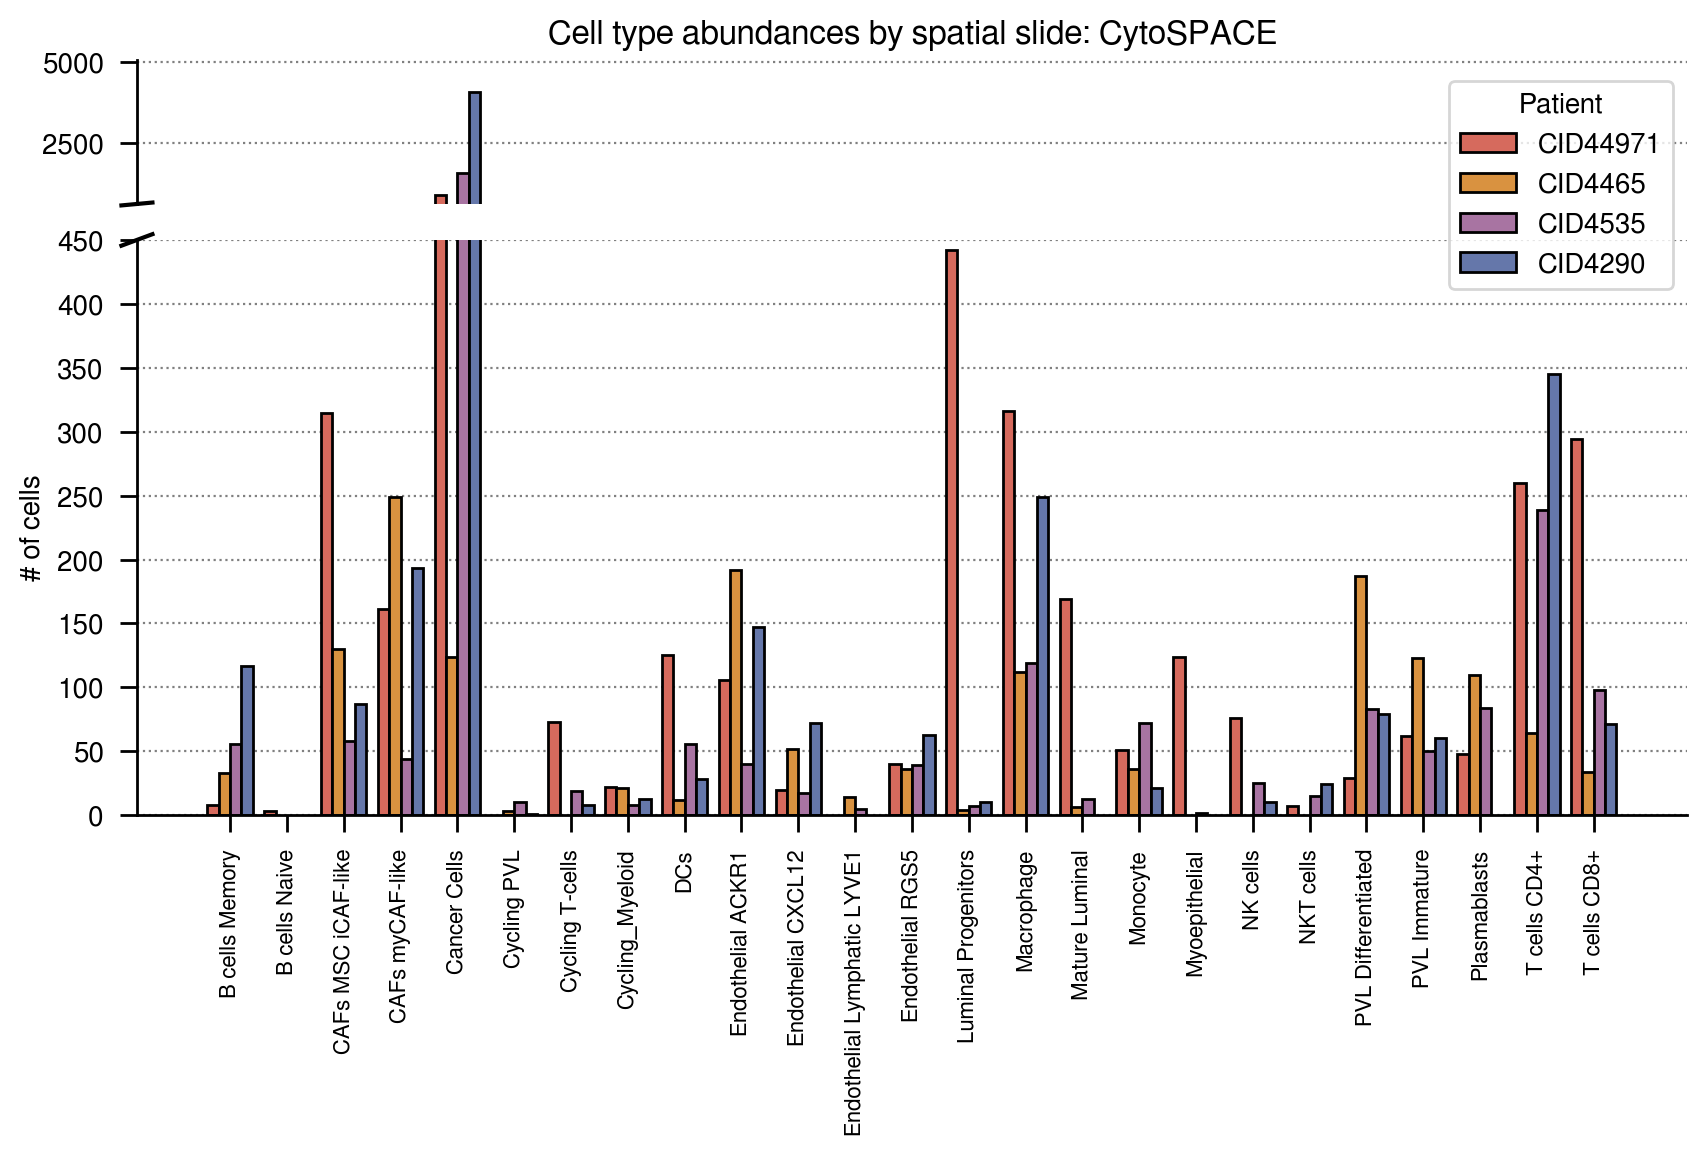

In [15]:
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5), dpi=200, gridspec_kw={'height_ratios': [1, 4], 'hspace': 0.1})

# Plot on each subplot
bars_top = sns.barplot(data=df_cell_counts, x='index', y='Count', hue='CID', ax=ax, palette=palette, edgecolor='black')
bars_bottom = sns.barplot(data=df_cell_counts, x='index', y='Count', hue='CID', ax=ax2, palette=palette, edgecolor='black')

# Set the limits for the y-axis on each subplot to create the break effect
ax.set_ylim(600, df_cell_counts['Count'].max() + 1000)  # Upper part
ax2.set_ylim(0, 450)  # Lower part

## despine function remove the top and right spines from the plot
sns.despine(ax=ax2)
## bottom=True specifies that you want to also remove this spine
sns.despine(ax=ax, bottom=True)

# Adding diagonal lines to indicate the break in axis
d = .01  # How big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # Top-left diagonal
kwargs.update(transform=ax2.transAxes)  # Switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal

# Adjustments and labels
ax.set_xlabel('')
ax.tick_params(axis='x', which='both', bottom=False)
ax.set_ylabel('')
ax.grid(axis='y', linestyle=':', color='gray', zorder=0)
ax.set_title('Cell type abundances by spatial slide: CytoSPACE', fontsize=title_size)
ax2.legend(title='Patient', loc='upper right', bbox_to_anchor=(1, 1.3))

ax.legend_.remove()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90, fontsize=label_size)
ax2.set_ylabel('# of cells', fontsize=labelout_size)
ax2.set_xlabel('')
ax2.grid(axis='y', linestyle=':', color='gray', zorder=0)

# Iterate on the different bars and put them on top of the grid
for bar in bars_top.patches:
    bar.set_zorder(2)

for bar in bars_bottom.patches:
    bar.set_zorder(2)


plt.savefig(global_path+'celltype_abundances_cytospace_supplementary_Cancer.svg',format='svg', dpi=300 , bbox_inches='tight')
plt.savefig(global_path + 'celltype_abundances_cytospace_supplementary_Cancer.png',format='png', dpi=300, facecolor='white', edgecolor='none', bbox_inches='tight')